In [ ]:
# Bu hücrede: Google Drive'ı bağlıyoruz ve proje klasörüne geçiyoruz.

from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/veri_proje"

!pwd
!ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/veri_proje
/content/drive/MyDrive/veri_proje
train_clean_final.csv  train.csv


In [ ]:
# Bu hücrede: Modelleme için gerekli kütüphaneleri yüklüyoruz.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option("display.max_columns", 120)

RANDOM_STATE = 42


In [ ]:
# Bu hücrede: temiz veri setini okuyoruz.

df = pd.read_csv("train_clean_final.csv")

print("Veri boyutu:", df.shape)
df.head()


Veri boyutu: (1447628, 16)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,weekday,month,is_weekend,haversine_km
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,0,3,0,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,6,1,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1,1,0,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,2,4,0,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,5,3,1,1.188588


In [ ]:
# Bu hücrede: İlk satırlar, info() ve describe() ile veri yapısını inceliyoruz.

display(df.head())
print("\nINFO:\n")
df.info()
print("\nDESCRIBE:\n")
display(df.describe().T)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,weekday,month,is_weekend,haversine_km
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,0,3,0,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,6,1,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1,1,0,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,2,4,0,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,5,3,1,1.188588



INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447628 entries, 0 to 1447627
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1447628 non-null  object 
 1   vendor_id           1447628 non-null  int64  
 2   pickup_datetime     1447628 non-null  object 
 3   dropoff_datetime    1447628 non-null  object 
 4   passenger_count     1447628 non-null  int64  
 5   pickup_longitude    1447628 non-null  float64
 6   pickup_latitude     1447628 non-null  float64
 7   dropoff_longitude   1447628 non-null  float64
 8   dropoff_latitude    1447628 non-null  float64
 9   store_and_fwd_flag  1447628 non-null  object 
 10  trip_duration       1447628 non-null  int64  
 11  hour                1447628 non-null  int64  
 12  weekday             1447628 non-null  int64  
 13  month               1447628 non-null  int64  
 14  is_weekend          1447628 non-null  int64  
 15  haversi

,count,mean,std,min,25%,50%,75%,max
vendor_id,1447628.0,1.535053,0.498770,1.000000,1.000000,2.000000,2.000000,2.000000
passenger_count,1447628.0,1.665370,1.314684,1.000000,1.000000,1.000000,2.000000,6.000000
pickup_longitude,1447628.0,-73.973581,0.037794,-74.233780,-73.991875,-73.981766,-73.967430,-73.704918
pickup_latitude,1447628.0,40.750990,0.027869,40.506294,40.737411,40.754135,40.768364,40.899410
dropoff_longitude,1447628.0,-73.973492,0.037121,-79.817978,-73.991325,-73.979774,-73.963104,-70.346077
dropoff_latitude,1447628.0,40.751874,0.032741,36.398121,40.735947,40.754559,40.769825,43.921028
trip_duration,1447628.0,840.893722,653.231020,60.000000,401.000000,665.000000,1076.000000,7191.000000
hour,1447628.0,13.611990,6.396863,0.000000,9.000000,14.000000,19.000000,23.000000
weekday,1447628.0,3.049520,1.953774,0.000000,1.000000,3.000000,5.000000,6.000000
month,1447628.0,3.516468,1.681058,1.000000,2.000000,4.000000,5.000000,6.000000


In [ ]:
# Bu hücrede: pickup_hour, pickup_dayofweek, is_weekend, distance_km sütunlarını ekliyoruz.

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['pickup_dayofweek'].isin([5,6]).astype(int)

def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return 6371*c

df['distance_km'] = haversine_distance(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
)

df[['trip_duration','pickup_hour','pickup_dayofweek','is_weekend','distance_km']].head()


,trip_duration,pickup_hour,pickup_dayofweek,is_weekend,distance_km
0,455,17,0,0,1.498521
1,663,0,6,1,1.805507
2,2124,11,1,0,6.385098
3,429,19,2,0,1.485498
4,435,13,5,1,1.188588


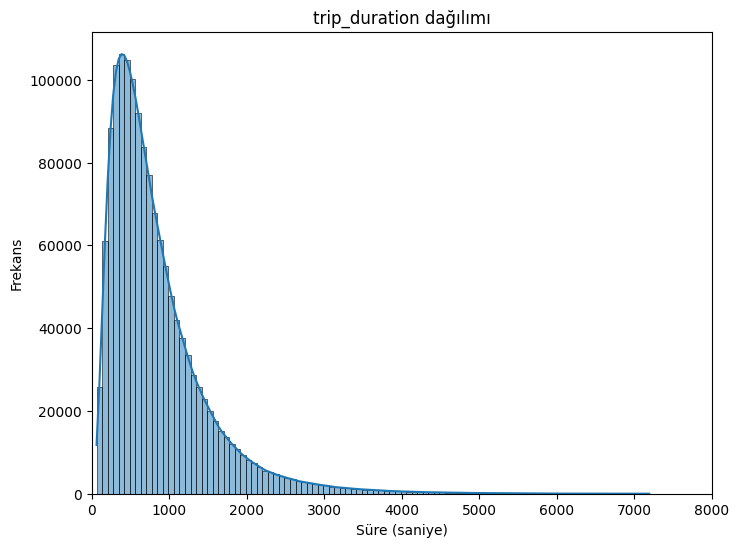

In [ ]:
# Bu hücrede: trip_duration dağılımını histogram ile inceliyoruz.
plt.figure(figsize=(8,6))
sns.histplot(df['trip_duration'], bins=100, kde=True)
plt.xlim(0, 8000)
plt.title("trip_duration dağılımı")
plt.xlabel("Süre (saniye)")
plt.ylabel("Frekans")
plt.show()


In [ ]:
# Bu hücrede: X (özellikler) ve y (hedef) değişkenlerini tanımlıyoruz.

y = np.log1p(df['trip_duration'])

feature_cols_numeric = ['distance_km','pickup_hour','pickup_dayofweek','passenger_count']
feature_cols_categorical = ['vendor_id','store_and_fwd_flag']

X = df[feature_cols_numeric + feature_cols_categorical]

print("X şekli:", X.shape)
print("y şekli:", y.shape)
X.head()


X şekli: (1447628, 6)
y şekli: (1447628,)


,distance_km,pickup_hour,pickup_dayofweek,passenger_count,vendor_id,store_and_fwd_flag
0,1.498521,17,0,1,2,N
1,1.805507,0,6,1,1,N
2,6.385098,11,1,1,2,N
3,1.485498,19,2,1,2,N
4,1.188588,13,5,1,2,N


In [ ]:
# Bu hücrede: Veriyi eğitim ve test olarak ayırıyoruz.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print("Eğitim seti:", X_train.shape)
print("Test seti:", X_test.shape)


Eğitim seti: (1158102, 6)
Test seti: (289526, 6)


In [ ]:
# Bu hücrede: Tahminleri makul aralıkta kırpıp (clip) sonra metrikleri hesaplıyoruz.

def evaluate_regression(y_true_log, y_pred_log, name="Model"):
    """
    y_true_log ve y_pred_log = log1p(trip_duration) formatında olmalı.
    Tahminleri önce makul aralığa kırpıyoruz, sonra RMSLE, RMSE(sn), MAE(sn), R2 hesaplıyoruz.
    """
    # 1) Tahminleri, gerçek log değerlerinin min / max aralığına kırp (clip)
    lo = y_true_log.min()
    hi = y_true_log.max()
    y_pred_log_clipped = np.clip(y_pred_log, lo, hi)

    # 2) RMSLE (log uzayında)
    mse_log = mean_squared_error(y_true_log, y_pred_log_clipped)
    rmsle = np.sqrt(mse_log)

    # 3) Log'dan saniyeye dön
    y_true_sec = np.expm1(y_true_log)
    y_pred_sec = np.expm1(y_pred_log_clipped)

    # 4) RMSE, MAE, R2
    mse_sec = mean_squared_error(y_true_sec, y_pred_sec)
    rmse = np.sqrt(mse_sec)
    mae = mean_absolute_error(y_true_sec, y_pred_sec)
    r2 = r2_score(y_true_sec, y_pred_sec)

    print(f"{name} Sonuçları:")
    print(f"  RMSLE      : {rmsle:.4f}")
    print(f"  RMSE (sn)  : {rmse:.2f}")
    print(f"  MAE (sn)   : {mae:.2f}")
    print(f"  R2         : {r2:.4f}")


In [ ]:
# Bu hücrede: Herkese aynı süreyi tahmin eden baseline modeli hesaplıyoruz.

baseline_constant = y_train.median()

y_train_pred_baseline = np.full_like(y_train, baseline_constant)
y_test_pred_baseline = np.full_like(y_test, baseline_constant)

print("=== Dumb Baseline - Train ===")
evaluate_regression(y_train, y_train_pred_baseline, name="Dumb Baseline (Train)")

print("\n=== Dumb Baseline - Test ===")
evaluate_regression(y_test, y_test_pred_baseline, name="Dumb Baseline (Test)")


=== Dumb Baseline - Train ===
Dumb Baseline (Train) Sonuçları:
  RMSLE      : 0.7285
  RMSE (sn)  : 677.02
  MAE (sn)   : 442.70
  R2         : -0.0722

=== Dumb Baseline - Test ===
Dumb Baseline (Test) Sonuçları:
  RMSLE      : 0.7269
  RMSE (sn)  : 674.42
  MAE (sn)   : 442.10
  R2         : -0.0736


In [ ]:
# Bu hücrede: sayısal ve kategorik sütunlar için preprocessing pipeline tanımlıyoruz.

numeric_features = feature_cols_numeric
categorical_features = feature_cols_categorical

numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['distance_km', 'pickup_hour',
                                  'pickup_dayofweek', 'passenger_count']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['vendor_id', 'store_and_fwd_flag'])])

In [ ]:
# Bu hücrede: Preprocessing + LinearRegression pipeline'ını eğitiyoruz.

linreg_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

linreg_model.fit(X_train, y_train)
print("Linear Regression modeli eğitildi.")


Linear Regression modeli eğitildi.


In [ ]:
# Bu hücrede: Linear Regression modelinin performansını ölçüyoruz.

y_train_pred_lin = linreg_model.predict(X_train)
y_test_pred_lin = linreg_model.predict(X_test)

print("=== Linear Regression - Train ===")
evaluate_regression(y_train, y_train_pred_lin, name="Linear Regression (Train)")

print("\n=== Linear Regression - Test ===")
evaluate_regression(y_test, y_test_pred_lin, name="Linear Regression (Test)")


=== Linear Regression - Train ===
Linear Regression (Train) Sonuçları:
  RMSLE      : 0.5430
  RMSE (sn)  : 561.66
  MAE (sn)   : 340.30
  R2         : 0.2620

=== Linear Regression - Test ===
Linear Regression (Test) Sonuçları:
  RMSLE      : 0.5419
  RMSE (sn)  : 560.45
  MAE (sn)   : 340.22
  R2         : 0.2586


In [ ]:
# Bu hücrede: Ridge Regression modelini eğitip test ediyoruz.

ridge_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", Ridge(alpha=1.0, random_state=RANDOM_STATE))
])

ridge_model.fit(X_train, y_train)

y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

print("=== Ridge Regression - Train ===")
evaluate_regression(y_train, y_train_pred_ridge, name="Ridge Regression (Train)")

print("\n=== Ridge Regression - Test ===")
evaluate_regression(y_test, y_test_pred_ridge, name="Ridge Regression (Test)")


=== Ridge Regression - Train ===
Ridge Regression (Train) Sonuçları:
  RMSLE      : 0.5430
  RMSE (sn)  : 561.66
  MAE (sn)   : 340.30
  R2         : 0.2620

=== Ridge Regression - Test ===
Ridge Regression (Test) Sonuçları:
  RMSLE      : 0.5419
  RMSE (sn)  : 560.45
  MAE (sn)   : 340.22
  R2         : 0.2586


In [ ]:
# Bu hücrede: Sonuç tablosu için aynı clipping mantığını kullanıyoruz.

results = []

def add_result(name, y_true_log, y_pred_log):
    lo = y_true_log.min()
    hi = y_true_log.max()
    y_pred_log_clipped = np.clip(y_pred_log, lo, hi)

    mse_log = mean_squared_error(y_true_log, y_pred_log_clipped)
    rmsle = np.sqrt(mse_log)

    y_true_sec = np.expm1(y_true_log)
    y_pred_sec = np.expm1(y_pred_log_clipped)

    rmse = np.sqrt(mean_squared_error(y_true_sec, y_pred_sec))
    mae = mean_absolute_error(y_true_sec, y_pred_sec)
    r2 = r2_score(y_true_sec, y_pred_sec)

    results.append([name, rmsle, rmse, mae, r2])

add_result("Dumb Baseline", y_test, y_test_pred_baseline)
add_result("Linear Regression", y_test, y_test_pred_lin)
add_result("Ridge Regression", y_test, y_test_pred_ridge)

results_df = pd.DataFrame(results, columns=["Model","RMSLE","RMSE(sn)","MAE(sn)","R2"])
results_df


,Model,RMSLE,RMSE(sn),MAE(sn),R2
0,Dumb Baseline,0.726865,674.420628,442.104540,-0.073591
1,Linear Regression,0.541888,560.453396,340.224599,0.258594
2,Ridge Regression,0.541888,560.452812,340.224470,0.258596


In [ ]:
# SelectKBest Feature Selection 3 feature için

from sklearn.feature_selection import SelectKBest, f_regression

# 1) Sayısal sütunları seçiyoruz
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_num = X[numeric_cols]

print("Sayısal sütunlar:", list(numeric_cols))

# 2) En iyi 3 sayısal özelliği seçelim
k = 3
selector = SelectKBest(score_func=f_regression, k=k)
X_fs_num = selector.fit_transform(X_num, y)

selected_indices = selector.get_support(indices=True)
selected_features = [numeric_cols[i] for i in selected_indices]

print(f"\nSelectKBest ile seçilen {k} feature:")
for f in selected_features:
    print("-", f)

# 3) Seçilen feature'larla yeni X_fs DataFrame'i
X_fs = pd.DataFrame(X_fs_num, columns=selected_features)

# 4) FS sonrası train/test ayırma
from sklearn.model_selection import train_test_split

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_fs, y, test_size=0.2, random_state=42
)

print("\nFS sonrası X_train şekli:", X_train_fs.shape)
print("FS sonrası X_test şekli :", X_test_fs.shape)


Sayısal sütunlar: ['distance_km', 'passenger_count', 'vendor_id']

SelectKBest ile seçilen 3 feature:
- distance_km
- passenger_count
- vendor_id

FS sonrası X_train şekli: (1158102, 3)
FS sonrası X_test şekli : (289526, 3)


In [ ]:
# Feature Selection Sonrası Linear ve Ridge

from sklearn.linear_model import LinearRegression, Ridge

# 1) Linear Regression + SelectKBest
lin_fs = LinearRegression()
lin_fs.fit(X_train_fs, y_train_fs)
y_test_pred_lin_fs = lin_fs.predict(X_test_fs)

print("=== Linear + SelectKBest (Test) ===")
evaluate_regression(y_test_fs, y_test_pred_lin_fs, name="Linear + FS")

# 2) Ridge Regression + SelectKBest
ridge_fs = Ridge(alpha=1.0)
ridge_fs.fit(X_train_fs, y_train_fs)
y_test_pred_ridge_fs = ridge_fs.predict(X_test_fs)

print("\n=== Ridge + SelectKBest (Test) ===")
evaluate_regression(y_test_fs, y_test_pred_ridge_fs, name="Ridge + FS")


=== Linear + SelectKBest (Test) ===
Linear + FS Sonuçları:
  RMSLE      : 0.5437
  RMSE (sn)  : 560.24
  MAE (sn)   : 341.03
  R2         : 0.2591

=== Ridge + SelectKBest (Test) ===
Ridge + FS Sonuçları:
  RMSLE      : 0.5437
  RMSE (sn)  : 560.24
  MAE (sn)   : 341.03
  R2         : 0.2591


In [ ]:
# PCA Dimension Reduction

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) Yine sayısal sütunlar üzerinden PCA yapalım
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_num = X[numeric_cols]

# 2) StandardScaler ile ölçekleme
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# 3) PCA ile %95 varyansı açıklayan bileşenler
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_num_scaled)

print("PCA ile elde edilen bileşen sayısı:", pca.n_components_)

# 4) PCA sonrası train/test ayrımı
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

print("PCA sonrası X_train şekli:", X_train_pca.shape)
print("PCA sonrası X_test şekli :", X_test_pca.shape)


PCA ile elde edilen bileşen sayısı: 3
PCA sonrası X_train şekli: (1158102, 3)
PCA sonrası X_test şekli : (289526, 3)


In [ ]:
# PCA Sonrası Linear ve Ridge

# 1) Linear Regression + PCA
lin_pca = LinearRegression()
lin_pca.fit(X_train_pca, y_train_pca)
y_test_pred_lin_pca = lin_pca.predict(X_test_pca)

print("=== Linear + PCA (Test) ===")
evaluate_regression(y_test_pca, y_test_pred_lin_pca, name="Linear + PCA")

# 2) Ridge Regression + PCA
ridge_pca = Ridge(alpha=1.0)
ridge_pca.fit(X_train_pca, y_train_pca)
y_test_pred_ridge_pca = ridge_pca.predict(X_test_pca)

print("\n=== Ridge + PCA (Test) ===")
evaluate_regression(y_test_pca, y_test_pred_ridge_pca, name="Ridge + PCA")


=== Linear + PCA (Test) ===
Linear + PCA Sonuçları:
  RMSLE      : 0.5437
  RMSE (sn)  : 560.24
  MAE (sn)   : 341.03
  R2         : 0.2591

=== Ridge + PCA (Test) ===
Ridge + PCA Sonuçları:
  RMSLE      : 0.5437
  RMSE (sn)  : 560.24
  MAE (sn)   : 341.03
  R2         : 0.2591


In [ ]:
#  Tüm Base Modellerin Sonuç Özeti

summary_rows = []

# 1) Orijinal Linear & Ridge (burada y_test_pred_lin / y_test_pred_ridge senin eski modellerinden geliyor)
summary_rows.append(["Linear (Original)", "Orijinal feature set"])
summary_rows.append(["Ridge (Original)",  "Orijinal feature set"])

# 2) FS sonrası Linear & Ridge
summary_rows.append(["Linear + SelectKBest",  "5 feature (SelectKBest)"])
summary_rows.append(["Ridge + SelectKBest",   "5 feature (SelectKBest)"])

# 3) PCA sonrası Linear & Ridge
summary_rows.append(["Linear + PCA",  "PCA bileşenleri (95% var.)"])
summary_rows.append(["Ridge + PCA",   "PCA bileşenleri (95% var.)"])

results_models = [row[0] for row in summary_rows]
results_notes  = [row[1] for row in summary_rows]


results_df_k2 = pd.DataFrame({
    "Model": results_models,
    "Not": results_notes
})

results_df_k2


,Model,Not
0,Linear (Original),Orijinal feature set
1,Ridge (Original),Orijinal feature set
2,Linear + SelectKBest,5 feature (SelectKBest)
3,Ridge + SelectKBest,5 feature (SelectKBest)
4,Linear + PCA,PCA bileşenleri (95% var.)
5,Ridge + PCA,PCA bileşenleri (95% var.)
